# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. here we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Setup

We will import the following libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [68]:
path1 = "../Data_Collecting&Wrangling/Wrangling/dataset_part_2.csv"
data = pd.read_csv(path1)

In [69]:
data.shape

(87, 19)

In [70]:
data.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Customer,Payload,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,SpaceX,Dragon Spacecraft Qualification Unit,1
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,NASA,Dragon,1
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,NASA,SpaceX CRS-2,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,MDA,CASSIOPE,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,SES,SES-8,1
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1005,-80.577366,28.561857,Thaicom,Thaicom 6,1
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1006,-80.577366,28.561857,NASA,SpaceX CRS-3,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1007,-80.577366,28.561857,Orbcomm,Orbcomm-OG2,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1008,-80.577366,28.561857,AsiaSat,AsiaSat 8,1
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,True None,1,False,False,False,1.0,0,B1011,-80.577366,28.561857,AsiaSat,AsiaSat 6,1


In [71]:
path2 = "../Exploratory_DataAnalysis(EDA)/Visualize with Matplotlib_seaborn/dataset_part_3.csv"
X = pd.read_csv(path2)

In [72]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TASK  1

We create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>.


In [73]:
Y = data['Class'].to_numpy()
Y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
Y.shape

(87,)

## TASK  2


We use the function train_test_split to split the data X and Y into training and test data. We set the parameter test_size to  0.2 and random_state to 2.


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=2, test_size=0.2)

In [76]:
y_test.shape

(18,)

In [77]:
X_test.shape

(18, 72)

In [78]:
print(X_train.shape, y_train.shape, sep='\n')

(69, 72)
(69,)


We split the data into training and testing data, The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Standardize the data using `Standard Scaler`

In [81]:
transform = preprocessing.StandardScaler()
X_train = transform.fit_transform(X_train)

In [82]:
X_test = transform.transform(X_test)

We should do this in scaling data to avoiding `data leakage`.  
We now scaled our data therefore our models will converge better.

## TASK  4


We create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code>. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [83]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [84]:
logreg_cv = GridSearchCV(lr, parameters)

In [85]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [86]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9131868131868132


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [87]:
logreg_cv.score(X_test, y_test)

0.8333333333333334

Lets look at the confusion matrix:


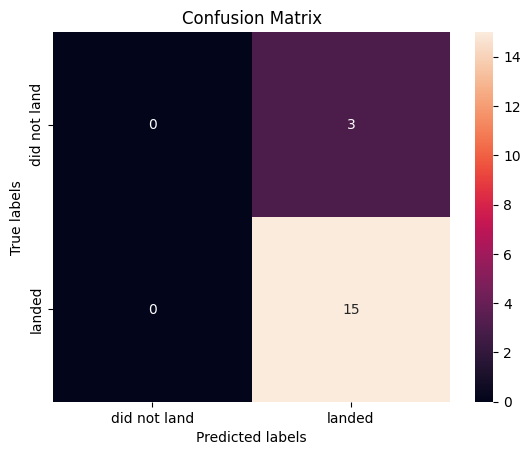

In [88]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code>.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [89]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [90]:
svm_cv = GridSearchCV(svm, parameters)

In [91]:
svm_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [92]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9131868131868132


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [93]:
svm_cv.score(X_test, y_test)

0.8333333333333334

We can plot the confusion matrix


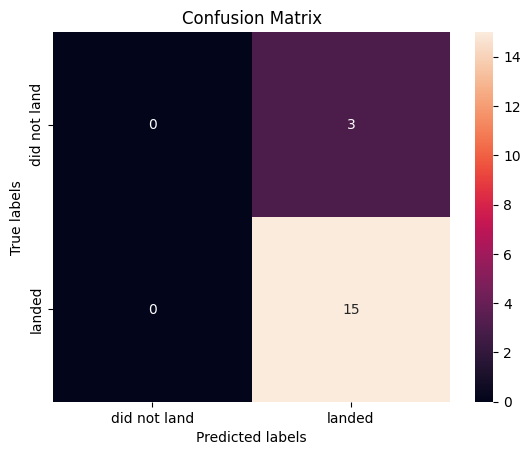

In [94]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  8


We create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> and  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [95]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [96]:
tree_cv = GridSearchCV(tree, parameters) 

In [97]:
tree_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [98]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9428571428571428


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [99]:
tree_cv.score(X_test, y_test)

0.9444444444444444

We can plot the confusion matrix


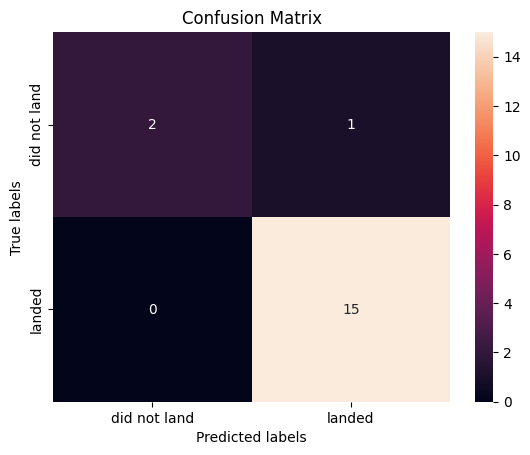

In [100]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code>.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [101]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [102]:
knn_cv = GridSearchCV(KNN, parameters)

In [103]:
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [104]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9131868131868132


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [105]:
knn_cv.score(X_test, y_test)

0.8333333333333334

We can plot the confusion matrix


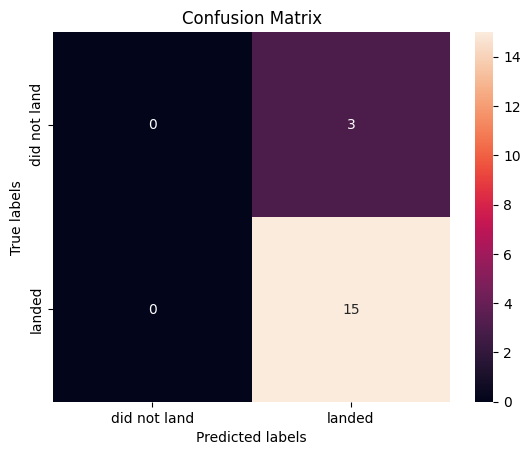

In [106]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## TASK  12


Find the method that performs best:


In [111]:
models_score = {'KNN_score':{'train':knn_cv.best_score_, 'test':knn_cv.score(X_test,y_test)},
                'Logistic_score':{'train':logreg_cv.best_score_, 'test':logreg_cv.score(X_test, y_test)},
                'TREE_score':{'train':tree_cv.best_score_, 'test':tree_cv.score(X_test, y_test)},
                'SVM_score':{'train':svm_cv.best_score_, 'test':svm_cv.score(X_test, y_test)}}
for index in models_score:
    print(index, models_score[index])

KNN_score {'train': 0.9131868131868132, 'test': 0.8333333333333334}
Logistic_score {'train': 0.9131868131868132, 'test': 0.8333333333333334}
TREE_score {'train': 0.9428571428571428, 'test': 0.9444444444444444}
SVM_score {'train': 0.9131868131868132, 'test': 0.8333333333333334}


Visualizing performance of our models

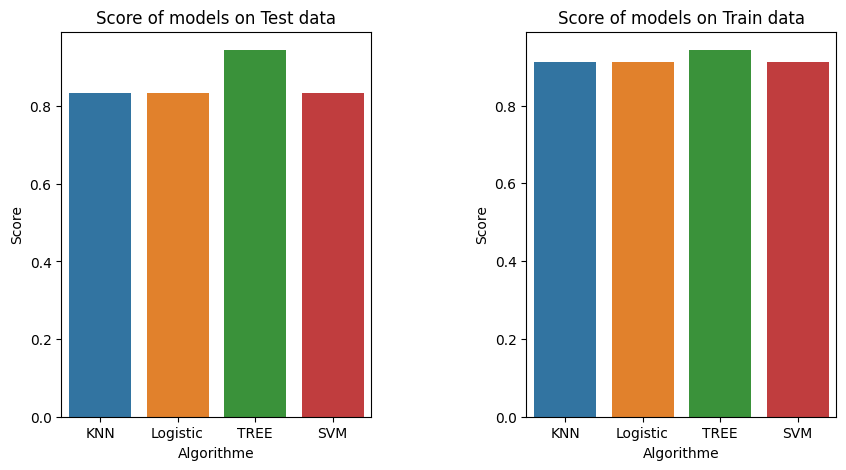

In [112]:
models_score = {'Algorithme':['KNN', 'Logistic', 'TREE', 'SVM'],
                'Score_train':[knn_cv.best_score_, logreg_cv.best_score_, tree_cv.best_score_, svm_cv.best_score_],
                'Score_test':[knn_cv.score(X_test, y_test), logreg_cv.score(X_test, y_test), tree_cv.score(X_test, y_test),
                              svm_cv.score(X_test, y_test)]
               }
scores = pd.DataFrame(models_score)


fig, axs = plt.subplots(1,2, figsize=(10, 5))

sns.barplot(data=scores, x='Algorithme', y='Score_test', hue='Algorithme', ax=axs[0])
sns.barplot(data=scores, x='Algorithme', y='Score_train', hue='Algorithme', ax=axs[1])
plt.subplots_adjust(wspace=0.5)

axs[0].set_title('Score of models on Test data')
axs[0].set_xlabel('Algorithme')
axs[0].set_ylabel('Score')

axs[1].set_title('Score of models on Train data')
axs[1].set_xlabel('Algorithme')
axs[1].set_ylabel('Score')

plt.show()

**best model is TREE** 

# Conclusion of the Falcon 9 Rocket Launch Success Prediction Project

## Key Findings
- **Top Performing Model**: The **Decision Tree Classifier** achieved the **highest accuracy (94%)** on our test dataset, demonstrating its effectiveness in our predictive modeling context.
- **Insightful Relationships**: Significant relationships were discovered between the **launch success rate** and **various features of the Falcon 9 rocket**. These insights were crucial in guiding our model development.

## Challenges and Limitations
- **Small Dataset Size**: A major limitation was the size of our dataset, which restricted the complexity of the models and precluded the use of advanced techniques like deep learning.
- **Data Collection Constraints**: Our reliance on data available from the **SpaceX API** and **WikiPedia** limited the scope of our analysis, potentially omitting influential variables.

## Implications and Future Directions
- **Preliminary Conclusions**: The outcomes, while promising, should be considered as preliminary due to the dataset limitations. They provide a foundational understanding but may not capture all dynamics of launch success.
- **Expansion of Dataset**: Future research would benefit from **larger and more diverse datasets**, possibly incorporating more comprehensive launch data.
- **Exploring Advanced Models**: Investigating more sophisticated ensemble methods, such as **Random Forests or Gradient Boosting**, could yield more robust predictions and should be a focus for future studies.

## Overall Impact
This project signifies a substantial advancement in applying machine learning to aerospace challenges, particularly in predicting Falcon 9 rocket launch success. The insights and methodologies developed here lay the groundwork for more extensive, data-driven explorations in aerospace science.

## Authors


<center>Moein(mrpintime)</center>
